In [92]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Colors
light_ioite = "#8462FF"
ioite = "#6236FF"
dark_ioite = "#5329E6"
very_dark_ioite = "#3F21A8"
apatite = "#32C5FF"
ruby = "#E02020"
light_ruby = "#FF6868"
amazonite = "#44D7B6"
dark_amazonite = "#339C84"
very_dark_amazonite = "#0A5544"
amber = "#FA6400"
dark_amber = "#CE5300"
very_dark_amber = "#A74300"
citrine = "#F7B500"
saphire = "#0091FF"
dark_saphire = "#006FC3"
pink = "#D40272"
graphite="#6D7278"
lightgrey = "#D8D8D8"
amethyst = "#B620E0"
light_amethyst = "#E17BFD"

# Measurements

In [171]:
# Prep data
scale_flops = 1e9

#            XS     S      M      L
x3d_acc = [59.37, 64.71, 67.24, 69.29]
x3d_flops = np.array([635560544, 2061365744, 4970008352, 19166052038])
x3d_cpu = np.array([8.26, 2.23, 0.83, 0.25])
x3d_tx2 = np.array([8.2, 2.68, 1.47, 0.19])
x3d_xavier = np.array([135.39, 42.92, 17.47, 4.78])
x3d_rtx = np.array([819.87, 276.45, 116.07, 36.37])


#               4x16   8x8
slowfast_acc = [67.06, 68.45]
slowfast_flops = np.array([36457025936, 66249298320]) 
slowfast_cpu = np.array([0.55, 0.34])
slowfast_tx2 = np.array([1.33, 0.87])
slowfast_xavier = np.array([3.43, 2.72])
slowfast_rtx = np.array([41.28, 30.72])

#               8      16
r2plus1d_acc = [53.52, 59.29] #56.78
r2plus1d_flops = np.array([20353500673, 40706796146]) 
r2plus1d_cpu = np.array([1.75, 0.83])
r2plus1d_tx2 = np.array([3.19, 1.82])
r2plus1d_xavier = np.array([6.82, 3.77])
r2plus1d_rtx = np.array([75.81, 61.92])

i3d_acc = [63.98]
i3d_flops = np.array([28607662480]) 
i3d_cpu = np.array([0.93])
i3d_tx2 = np.array([2.54])
i3d_xavier = np.array([9.20])
i3d_rtx = np.array([77.15])

slow_acc = [67.42]
slow_flops = np.array([54.87]) * scale_flops
slow_cpu = np.array([0.38])
slow_tx2 = np.array([1.34])
slow_xavier = np.array([4.31])
slow_rtx = np.array([61.92])

ViViT_L_16x2_acc = [81.0]
ViViT_L_16x2_flops = np.array([3992]) * scale_flops

#          R50   R101  ViT-B 
VTN_acc = [71.2, 72.1, 78.6]
VTN_flops = np.array([1059, 1989, 4218]) * scale_flops


            # 13      64
CoX3D_s_acc = [60.18, 67.33]
CoX3D_s_flops = list(np.array([0.17, 0.17]) * scale_flops)
CoX3D_s_cpu = np.array([13.16, 13.19])
CoX3D_s_tx2 = np.array([11.06, 11.13])
CoX3D_s_xavier = np.array([219.64, 213.65])
CoX3D_s_rtx = np.array([939.72, 942.97])

             # 16     64
CoX3D_m_acc = [62.80, 71.03]
CoX3D_m_flops = list(np.array([0.33, 0.33]) * scale_flops)
CoX3D_m_cpu = np.array([7.57, 7.51])
CoX3D_m_tx2 = np.array([7.26, 7.04])
CoX3D_m_xavier = np.array([88.79, 86.42])
CoX3D_m_rtx = np.array([844.73, 796.32])

             # 16     64
CoX3D_l_acc = [63.03, 71.61]
CoX3D_l_flops = list(np.array([1.25, 1.25]) * scale_flops)
CoX3D_l_cpu = np.array([2.30, 2.30])
CoX3D_l_tx2 = np.array([0.99, 0.99])
CoX3D_l_xavier = np.array([25.17, 27.56])
CoX3D_l_rtx = np.array([206.65, 217.53])

             # 8     64
CoI3D_acc = [59.58, 56.86]
CoI3D_flops = list(np.array([5.68, 5.68]) * scale_flops)
CoI3D_cpu = np.array([3.00, 3.15])
CoI3D_tx2 = np.array([2.41, 2.41])
CoI3D_xavier = np.array([14.88, 14.89])
CoI3D_rtx = np.array([125.59, 126.32])

             # 8     64
CoSlow_acc = [65.90, 73.05]
CoSlow_flops = list(np.array([6.90, 6.90]) * scale_flops)
CoSlow_cpu = np.array([2.80, 2.92])
CoSlow_tx2 = np.array([1.60, 1.60])
CoSlow_xavier = np.array([6.18, 6.19])
CoSlow_rtx = np.array([113.77, 102.00])

RCU_acc = [53.4]
RCU_flops = list(np.array([4.71]) * scale_flops)


print(
    f"X3D-L flops saving: {x3d_flops[-1] / CoX3D_l_flops[1]:.2f} \n"
    f"      acc boost: {CoX3D_l_acc[-1] - x3d_acc[-1]:.2f} %"
)
print(
    f"X3D-M flops saving: {x3d_flops[-2] / CoX3D_m_flops[1]:.2f} \n"
    f"      acc boost: {CoX3D_m_acc[-1] - x3d_acc[-2]:.2f} %"
)
print(
    f"X3D-S flops saving: {x3d_flops[-3] / CoX3D_s_flops[1]:.2f} \n"
    f"      acc boost: {CoX3D_s_acc[-1] - x3d_acc[-3]:.2f} %"
)
print(
    f"I3D flops saving: {i3d_flops[0] / CoI3D_flops[0]:.2f} \n"
    f"      acc boost: {CoI3D_acc[-1] - i3d_acc[-1]:.2f} %"
)
print(
    f"Slow flops saving: {slow_flops[0] / CoSlow_flops[0]:.2f} \n"
    f"      acc boost: {CoSlow_acc[-1]- slow_acc[0]:.2f} %"
)




X3D-L flops saving: 15.33 
      acc boost: 2.32 %
X3D-M flops saving: 15.06 
      acc boost: 3.79 %
X3D-S flops saving: 12.13 
      acc boost: 2.62 %
I3D flops saving: 5.04 
      acc boost: -7.12 %
Slow flops saving: 7.95 
      acc boost: 5.63 %


In [123]:
CoX3D_s_tx2/ x3d_tx2[-3]

array([4.12686567, 4.15298507])

# FLOPs

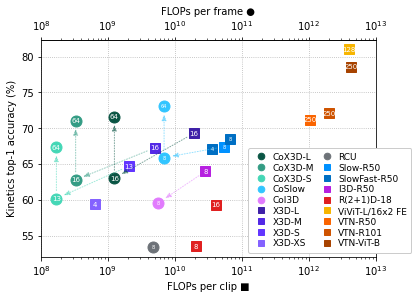

In [152]:
# Plot 
fig, ax = plt.subplots(constrained_layout=False)
# fig.set_size_inches(10,8)


# Params
markersize = 11
textsize = 7

ax.plot(CoX3D_l_flops, CoX3D_l_acc, c=very_dark_amazonite, markersize=markersize, label="CoX3D-L", marker="o", linestyle=" ")
ax.plot(CoX3D_m_flops, CoX3D_m_acc, c=dark_amazonite, markersize=markersize, label="CoX3D-M", marker="o", linestyle=" ")
ax.plot(CoX3D_s_flops, CoX3D_s_acc, c=amazonite, markersize=markersize, label="CoX3D-S", marker="o", linestyle=" ")
# ax.plot([60], [60], c="white", markersize=1, label=" ", marker="s", linestyle=" ")

ax.plot(CoSlow_flops, CoSlow_acc, c=apatite, markersize=markersize, label="CoSlow", marker="o", linestyle=" ")

ax.plot([CoI3D_flops[0]], [CoI3D_acc[0]], c=light_amethyst, markersize=markersize, label="CoI3D", marker="o", linestyle=" ")


ax.plot([x3d_flops[3]], [x3d_acc[3]], c=very_dark_ioite, markersize=markersize-1, label="X3D-L", marker="s", linestyle=" ")
ax.plot([x3d_flops[2]], [x3d_acc[2]], c=dark_ioite, markersize=markersize-1, label="X3D-M", marker="s", linestyle=" ")
ax.plot([x3d_flops[1]], [x3d_acc[1]], c=ioite, markersize=markersize-1, label="X3D-S", marker="s", linestyle=" ")
ax.plot([x3d_flops[0]], [x3d_acc[0]], c=light_ioite, markersize=markersize-1, label="X3D-XS", marker="s", linestyle=" ")

ax.plot(RCU_flops, RCU_acc, c=graphite, markersize=markersize, label="RCU", marker="o", linestyle=" ")

ax.plot([slow_flops[0]], [slow_acc[0]], c=saphire, markersize=markersize-1, label="Slow-R50", marker="s", linestyle=" ")

ax.plot(slowfast_flops, slowfast_acc, c=dark_saphire, markersize=markersize-1, label="SlowFast-R50", marker="s", linestyle=" ")

ax.plot(i3d_flops, i3d_acc, c=amethyst, markersize=markersize-1, label="I3D-R50", marker="s", linestyle=" ")

ax.plot(r2plus1d_flops, r2plus1d_acc, c=ruby, markersize=markersize-1, label="R(2+1)D-18", marker="s", linestyle=" ")

ax.plot(ViViT_L_16x2_flops, ViViT_L_16x2_acc, c=citrine, markersize=markersize-1, label="ViViT-L/16x2 FE", marker="s", linestyle=" ")

ax.plot([VTN_flops[0]], [VTN_acc[0]], c=amber, markersize=markersize-1, label="VTN-R50", marker="s", linestyle=" ")
ax.plot([VTN_flops[1]], [VTN_acc[1]], c=dark_amber, markersize=markersize-1, label="VTN-R101", marker="s", linestyle=" ")
ax.plot([VTN_flops[2]], [VTN_acc[2]], c=very_dark_amber, markersize=markersize-1, label="VTN-ViT-B", marker="s", linestyle=" ")

ax.set_ylabel('Kinetics top-1 accuracy (%)')
ax.set_xlabel('FLOPs per clip ■') #◆
secax = ax.secondary_xaxis('top')
secax.set_xlabel('FLOPs per frame ●')

# Annotation

# - Arrows
prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.5",
            shrinkA=8,
            shrinkB=8,
            alpha=0.5,
            linestyle=":")

plt.annotate(
    "", 
    xy=(CoX3D_s_flops[0], CoX3D_s_acc[0]),
    xytext=(x3d_flops[1], x3d_acc[1], ), 
    arrowprops={**prop, "color": amazonite,},
)
plt.annotate(
    "", 
    xy=(CoX3D_m_flops[0], CoX3D_m_acc[0]),
    xytext=(x3d_flops[2], x3d_acc[2], ), 
    arrowprops={**prop, "color": dark_amazonite, },
)
plt.annotate(
    "", 
    xy=(CoX3D_l_flops[0], CoX3D_l_acc[0]),
    xytext=(x3d_flops[3], x3d_acc[3], ), 
    arrowprops={**prop, "color": very_dark_amazonite, },
)

plt.annotate(
    "", 
    xy=(CoX3D_s_flops[1], CoX3D_s_acc[1]),
    xytext=(CoX3D_s_flops[0], CoX3D_s_acc[0], ), 
    arrowprops={**prop, "color": amazonite,},
)
plt.annotate(
    "", 
    xy=(CoX3D_m_flops[1], CoX3D_m_acc[1]),
    xytext=(CoX3D_m_flops[0], CoX3D_m_acc[0], ),
    arrowprops={**prop, "color": dark_amazonite, },
)
plt.annotate(
    "", 
    xy=(CoX3D_l_flops[1], CoX3D_l_acc[1]),
    xytext=(CoX3D_l_flops[0], CoX3D_l_acc[0], ),
    arrowprops={**prop, "color": very_dark_amazonite, },
)

plt.annotate(
    "", 
    xy=(CoSlow_flops[0], CoSlow_acc[0]),
    xytext=(slow_flops[0], slow_acc[0], ), 
    arrowprops={**prop, "color": apatite, },
)
plt.annotate(
    "", 
    xy=(CoSlow_flops[1], CoSlow_acc[1]),
    xytext=(CoSlow_flops[0], CoSlow_acc[0]), 
    arrowprops={**prop, "color": apatite,},
)

plt.annotate(
    "", 
    xy=(CoI3D_flops[0], CoI3D_acc[0]),
    xytext=(i3d_flops[0], i3d_acc[0], ), 
    arrowprops={**prop, "color": light_amethyst, },
)


# - X3D
for name, f, a in zip(["4", "13", "16", "16"], x3d_flops, x3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
        
# - CoX3D
for name, f, a in zip([13,64], CoX3D_s_flops, CoX3D_s_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,64], CoX3D_m_flops, CoX3D_m_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,64], CoX3D_l_flops, CoX3D_l_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - CoSlow
for name, f, a in zip([8, 64], CoSlow_flops, CoSlow_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - CoI3D
for name, f, a in zip([8], CoI3D_flops, CoI3D_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - RCU
for name, f, a in zip([8], RCU_flops, RCU_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - SlowFast
for name, f, a in zip(["4", "8"], slowfast_flops, slowfast_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - Slow
for name, f, a in zip(["8"], slow_flops, slow_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - I3D
for name, f, a in zip(["8"], i3d_flops, i3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - R(2+1)D
for name, f, a in zip(["8","16"], r2plus1d_flops, r2plus1d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - ViViT
for name, f, a in zip(["128"], ViViT_L_16x2_flops, ViViT_L_16x2_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - VTN
for name, f, a in zip([250, 250, 250], VTN_flops, VTN_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# General setup
legend = plt.legend(
    loc="lower right", 
    framealpha=1.0, 
    borderpad=0.5, 
    markerscale=0.6,
    scatterpoints=1, 
    ncol=2,
    columnspacing=0.5,
    labelspacing=0.2,
    handletextpad=0.2,
    prop={'size': markersize-2},
    bbox_to_anchor=[0.12,0,1,1]
) 

ax.set_xscale('log'); 
plt.xlim([1e8, 1e13])
# plt.ylim([50, 80])
plt.grid(linestyle='dotted')
plt.show()

In [101]:
fig.savefig("acc-vs-flops-log.pdf")

## CPU

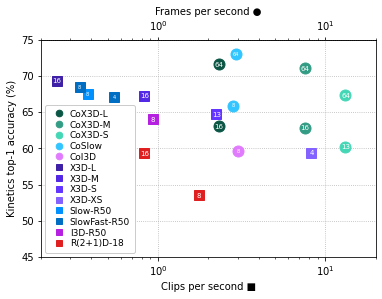

In [168]:
# Plot 
fig, ax = plt.subplots(constrained_layout=False)
# fig.set_size_inches(10,8)


# Params
markersize = 11
textsize = 7

ax.plot(CoX3D_l_cpu, CoX3D_l_acc, c=very_dark_amazonite, markersize=markersize, label="CoX3D-L", marker="o", linestyle=" ")
ax.plot(CoX3D_m_cpu, CoX3D_m_acc, c=dark_amazonite, markersize=markersize, label="CoX3D-M", marker="o", linestyle=" ")
ax.plot(CoX3D_s_cpu, CoX3D_s_acc, c=amazonite, markersize=markersize, label="CoX3D-S", marker="o", linestyle=" ")

ax.plot(CoSlow_cpu, CoSlow_acc, c=apatite, markersize=markersize, label="CoSlow", marker="o", linestyle=" ")

ax.plot([CoI3D_cpu[0]], [CoI3D_acc[0]], c=light_amethyst, markersize=markersize, label="CoI3D", marker="o", linestyle=" ")

ax.plot([x3d_cpu[3]], [x3d_acc[3]], c=very_dark_ioite, markersize=markersize-1, label="X3D-L", marker="s", linestyle=" ")
ax.plot([x3d_cpu[2]], [x3d_acc[2]], c=dark_ioite, markersize=markersize-1, label="X3D-M", marker="s", linestyle=" ")
ax.plot([x3d_cpu[1]], [x3d_acc[1]], c=ioite, markersize=markersize-1, label="X3D-S", marker="s", linestyle=" ")
ax.plot([x3d_cpu[0]], [x3d_acc[0]], c=light_ioite, markersize=markersize-1, label="X3D-XS", marker="s", linestyle=" ")

ax.plot([slow_cpu[0]], [slow_acc[0]], c=saphire, markersize=markersize-1, label="Slow-R50", marker="s", linestyle=" ")

ax.plot(slowfast_cpu, slowfast_acc, c=dark_saphire, markersize=markersize-1, label="SlowFast-R50", marker="s", linestyle=" ")

ax.plot(i3d_cpu, i3d_acc, c=amethyst, markersize=markersize-1, label="I3D-R50", marker="s", linestyle=" ")

ax.plot(r2plus1d_cpu, r2plus1d_acc, c=ruby, markersize=markersize-1, label="R(2+1)D-18", marker="s", linestyle=" ")


ax.set_ylabel('Kinetics top-1 accuracy (%)')
ax.set_xlabel('Clips per second ■') #◆
secax = ax.secondary_xaxis('top')
secax.set_xlabel('Frames per second ●')

# Annotation

# - X3D
for name, f, a in zip(["4", "13", "16", "16"], x3d_cpu, x3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - CoX3D
for name, f, a in zip([13,64], CoX3D_s_cpu, CoX3D_s_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,64], CoX3D_m_cpu, CoX3D_m_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,64], CoX3D_l_cpu, CoX3D_l_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - CoSlow
for name, f, a in zip([8, 64], CoSlow_cpu, CoSlow_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - CoI3D
for name, f, a in zip([8], CoI3D_cpu, CoI3D_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - SlowFast
for name, f, a in zip(["4", "8"], slowfast_cpu, slowfast_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - Slow
for name, f, a in zip(["8"], slow_cpu, slow_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - I3D
for name, f, a in zip(["8"], i3d_cpu, i3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - R(2+1)D
for name, f, a in zip(["8","16"], r2plus1d_cpu, r2plus1d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")


# General setup
legend = plt.legend(
    loc="lower left", 
    framealpha=1.0, 
    borderpad=0.5, 
    markerscale=0.6,
    scatterpoints=1, 
    ncol=1,
    columnspacing=0.5,
    labelspacing=0.2,
    handletextpad=0.2,
    prop={'size': markersize-2},
    # bbox_to_anchor=[0,-0.1,1,1]
) 

ax.set_xscale('log'); 
plt.xlim([2e-1, 2e1])
plt.ylim([45, 75])
plt.grid(linestyle='dotted')
plt.show()

In [169]:
fig.savefig("acc-vs-cpu-log.pdf")

# TX2

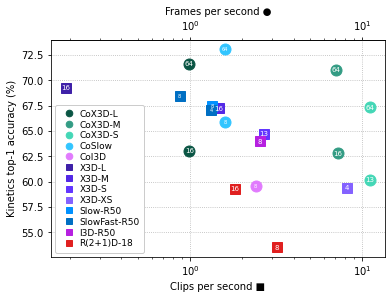

In [173]:
# Plot 
fig, ax = plt.subplots(constrained_layout=False)
# fig.set_size_inches(10,8)


# Params
markersize = 11
textsize = 7

ax.plot(CoX3D_l_tx2, CoX3D_l_acc, c=very_dark_amazonite, markersize=markersize, label="CoX3D-L", marker="o", linestyle=" ")
ax.plot(CoX3D_m_tx2, CoX3D_m_acc, c=dark_amazonite, markersize=markersize, label="CoX3D-M", marker="o", linestyle=" ")
ax.plot(CoX3D_s_tx2, CoX3D_s_acc, c=amazonite, markersize=markersize, label="CoX3D-S", marker="o", linestyle=" ")
# ax.plot([60], [60], c="white", markersize=1, label=" ", marker="s", linestyle=" ")

ax.plot(CoSlow_tx2, CoSlow_acc, c=apatite, markersize=markersize, label="CoSlow", marker="o", linestyle=" ")

ax.plot([CoI3D_tx2[0]], [CoI3D_acc[0]], c=light_amethyst, markersize=markersize, label="CoI3D", marker="o", linestyle=" ")


ax.plot([x3d_tx2[3]], [x3d_acc[3]], c=very_dark_ioite, markersize=markersize-1, label="X3D-L", marker="s", linestyle=" ")
ax.plot([x3d_tx2[2]], [x3d_acc[2]], c=dark_ioite, markersize=markersize-1, label="X3D-M", marker="s", linestyle=" ")
ax.plot([x3d_tx2[1]], [x3d_acc[1]], c=ioite, markersize=markersize-1, label="X3D-S", marker="s", linestyle=" ")
ax.plot([x3d_tx2[0]], [x3d_acc[0]], c=light_ioite, markersize=markersize-1, label="X3D-XS", marker="s", linestyle=" ")

ax.plot([slow_tx2[0]], [slow_acc[0]], c=saphire, markersize=markersize-1, label="Slow-R50", marker="s", linestyle=" ")

ax.plot(slowfast_tx2, slowfast_acc, c=dark_saphire, markersize=markersize-1, label="SlowFast-R50", marker="s", linestyle=" ")

ax.plot(i3d_tx2, i3d_acc, c=amethyst, markersize=markersize-1, label="I3D-R50", marker="s", linestyle=" ")

ax.plot(r2plus1d_tx2, r2plus1d_acc, c=ruby, markersize=markersize-1, label="R(2+1)D-18", marker="s", linestyle=" ")


ax.set_ylabel('Kinetics top-1 accuracy (%)')
ax.set_xlabel('Clips per second ■') #◆
secax = ax.secondary_xaxis('top')
secax.set_xlabel('Frames per second ●')

# Annotation

# - X3D
for name, f, a in zip(["4", "13", "16", "16"], x3d_tx2, x3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

        
# - CoX3D
for name, f, a in zip([13,64], CoX3D_s_tx2, CoX3D_s_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,64], CoX3D_m_tx2, CoX3D_m_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,64], CoX3D_l_tx2, CoX3D_l_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - CoSlow
for name, f, a in zip([8, 64], CoSlow_tx2, CoSlow_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - CoI3D
for name, f, a in zip([8], CoI3D_tx2, CoI3D_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - SlowFast
for name, f, a in zip(["4", "8"], slowfast_tx2, slowfast_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - Slow
for name, f, a in zip(["8"], slow_tx2, slow_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - I3D
for name, f, a in zip(["8"], i3d_tx2, i3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - R(2+1)D
for name, f, a in zip(["8","16"], r2plus1d_tx2, r2plus1d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")


# General setup
legend = plt.legend(
    loc="lower left", 
    framealpha=1.0, 
    borderpad=0.5, 
    markerscale=0.6,
    scatterpoints=1, 
    ncol=1,
    columnspacing=0.5,
    labelspacing=0.2,
    handletextpad=0.2,
    prop={'size': markersize-2},
    # bbox_to_anchor=[0,-0.1,1,1]
) 

ax.set_xscale('log'); 
# plt.xlim([2e-1, 2e1])
# plt.ylim([45, 75])
plt.grid(linestyle='dotted')
plt.show()

In [174]:
fig.savefig("acc-vs-tx2-log.pdf")

# Xavier

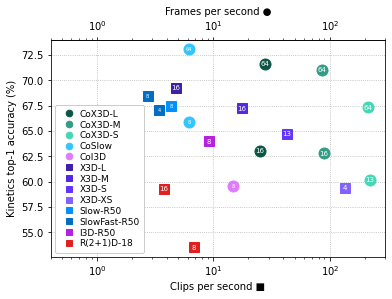

In [181]:
# Plot 
fig, ax = plt.subplots(constrained_layout=False)
# fig.set_size_inches(10,8)


# Params
markersize = 11
textsize = 7

ax.plot(CoX3D_l_xavier, CoX3D_l_acc, c=very_dark_amazonite, markersize=markersize, label="CoX3D-L", marker="o", linestyle=" ")
ax.plot(CoX3D_m_xavier, CoX3D_m_acc, c=dark_amazonite, markersize=markersize, label="CoX3D-M", marker="o", linestyle=" ")
ax.plot(CoX3D_s_xavier, CoX3D_s_acc, c=amazonite, markersize=markersize, label="CoX3D-S", marker="o", linestyle=" ")
# ax.plot([60], [60], c="white", markersize=1, label=" ", marker="s", linestyle=" ")

ax.plot(CoSlow_xavier, CoSlow_acc, c=apatite, markersize=markersize, label="CoSlow", marker="o", linestyle=" ")

ax.plot([CoI3D_xavier[0]], [CoI3D_acc[0]], c=light_amethyst, markersize=markersize, label="CoI3D", marker="o", linestyle=" ")


ax.plot([x3d_xavier[3]], [x3d_acc[3]], c=very_dark_ioite, markersize=markersize-1, label="X3D-L", marker="s", linestyle=" ")
ax.plot([x3d_xavier[2]], [x3d_acc[2]], c=dark_ioite, markersize=markersize-1, label="X3D-M", marker="s", linestyle=" ")
ax.plot([x3d_xavier[1]], [x3d_acc[1]], c=ioite, markersize=markersize-1, label="X3D-S", marker="s", linestyle=" ")
ax.plot([x3d_xavier[0]], [x3d_acc[0]], c=light_ioite, markersize=markersize-1, label="X3D-XS", marker="s", linestyle=" ")

ax.plot([slow_xavier[0]], [slow_acc[0]], c=saphire, markersize=markersize-1, label="Slow-R50", marker="s", linestyle=" ")

ax.plot(slowfast_xavier, slowfast_acc, c=dark_saphire, markersize=markersize-1, label="SlowFast-R50", marker="s", linestyle=" ")

ax.plot(i3d_xavier, i3d_acc, c=amethyst, markersize=markersize-1, label="I3D-R50", marker="s", linestyle=" ")

ax.plot(r2plus1d_xavier, r2plus1d_acc, c=ruby, markersize=markersize-1, label="R(2+1)D-18", marker="s", linestyle=" ")


ax.set_ylabel('Kinetics top-1 accuracy (%)')
ax.set_xlabel('Clips per second ■') #◆
secax = ax.secondary_xaxis('top')
secax.set_xlabel('Frames per second ●')

# Annotation

# - X3D
for name, f, a in zip(["4", "13", "16", "16"], x3d_xavier, x3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

        
# - CoX3D
for name, f, a in zip([13,64], CoX3D_s_xavier, CoX3D_s_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,64], CoX3D_m_xavier, CoX3D_m_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,64], CoX3D_l_xavier, CoX3D_l_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - CoSlow
for name, f, a in zip([8, 64], CoSlow_xavier, CoSlow_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - CoI3D
for name, f, a in zip([8], CoI3D_xavier, CoI3D_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - SlowFast
for name, f, a in zip(["4", "8"], slowfast_xavier, slowfast_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - Slow
for name, f, a in zip(["8"], slow_xavier, slow_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - I3D
for name, f, a in zip(["8"], i3d_xavier, i3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - R(2+1)D
for name, f, a in zip(["8","16"], r2plus1d_xavier, r2plus1d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")


# General setup
legend = plt.legend(
    loc="lower left", 
    framealpha=1.0, 
    borderpad=0.5, 
    markerscale=0.6,
    scatterpoints=1, 
    ncol=1,
    columnspacing=0.5,
    labelspacing=0.2,
    handletextpad=0.2,
    prop={'size': markersize-2},
    # bbox_to_anchor=[0,-0.1,1,1]
) 

ax.set_xscale('log'); 
plt.xlim([4e-1, 3e2])
# plt.ylim([45, 75])
plt.grid(linestyle='dotted')
plt.show()

In [182]:
fig.savefig("acc-vs-xavier-log.pdf")

# RTX2080Ti

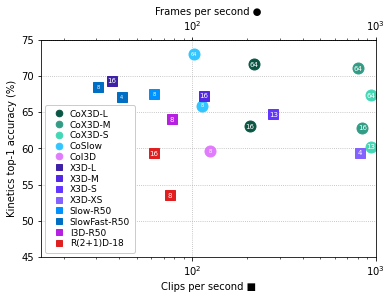

In [192]:
# Plot 
fig, ax = plt.subplots(constrained_layout=False)
# fig.set_size_inches(10,8)


# Params
markersize = 11
textsize = 7

ax.plot(CoX3D_l_rtx, CoX3D_l_acc, c=very_dark_amazonite, markersize=markersize, label="CoX3D-L", marker="o", linestyle=" ")
ax.plot(CoX3D_m_rtx, CoX3D_m_acc, c=dark_amazonite, markersize=markersize, label="CoX3D-M", marker="o", linestyle=" ")
ax.plot(CoX3D_s_rtx, CoX3D_s_acc, c=amazonite, markersize=markersize, label="CoX3D-S", marker="o", linestyle=" ")
# ax.plot([60], [60], c="white", markersize=1, label=" ", marker="s", linestyle=" ")

ax.plot(CoSlow_rtx, CoSlow_acc, c=apatite, markersize=markersize, label="CoSlow", marker="o", linestyle=" ")

ax.plot([CoI3D_rtx[0]], [CoI3D_acc[0]], c=light_amethyst, markersize=markersize, label="CoI3D", marker="o", linestyle=" ")


ax.plot([x3d_rtx[3]], [x3d_acc[3]], c=very_dark_ioite, markersize=markersize-1, label="X3D-L", marker="s", linestyle=" ")
ax.plot([x3d_rtx[2]], [x3d_acc[2]], c=dark_ioite, markersize=markersize-1, label="X3D-M", marker="s", linestyle=" ")
ax.plot([x3d_rtx[1]], [x3d_acc[1]], c=ioite, markersize=markersize-1, label="X3D-S", marker="s", linestyle=" ")
ax.plot([x3d_rtx[0]], [x3d_acc[0]], c=light_ioite, markersize=markersize-1, label="X3D-XS", marker="s", linestyle=" ")

ax.plot([slow_rtx[0]], [slow_acc[0]], c=saphire, markersize=markersize-1, label="Slow-R50", marker="s", linestyle=" ")

ax.plot(slowfast_rtx, slowfast_acc, c=dark_saphire, markersize=markersize-1, label="SlowFast-R50", marker="s", linestyle=" ")

ax.plot(i3d_rtx, i3d_acc, c=amethyst, markersize=markersize-1, label="I3D-R50", marker="s", linestyle=" ")

ax.plot(r2plus1d_rtx, r2plus1d_acc, c=ruby, markersize=markersize-1, label="R(2+1)D-18", marker="s", linestyle=" ")


ax.set_ylabel('Kinetics top-1 accuracy (%)')
ax.set_xlabel('Clips per second ■') #◆
secax = ax.secondary_xaxis('top')
secax.set_xlabel('Frames per second ●')

# Annotation

# - X3D
for name, f, a in zip(["4", "13", "16", "16"], x3d_rtx, x3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

        
# - CoX3D
for name, f, a in zip([13,64], CoX3D_s_rtx, CoX3D_s_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,64], CoX3D_m_rtx, CoX3D_m_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,64], CoX3D_l_rtx, CoX3D_l_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - CoSlow
for name, f, a in zip([8, 64], CoSlow_rtx, CoSlow_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - CoI3D
for name, f, a in zip([8], CoI3D_rtx, CoI3D_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - SlowFast
for name, f, a in zip(["4", "8"], slowfast_rtx, slowfast_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - Slow
for name, f, a in zip(["8"], slow_rtx, slow_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize-2, color="white")

# - I3D
for name, f, a in zip(["8"], i3d_rtx, i3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")

# - R(2+1)D
for name, f, a in zip(["8","16"], r2plus1d_rtx, r2plus1d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")


# General setup
legend = plt.legend(
    loc="lower left", 
    framealpha=1.0, 
    borderpad=0.5, 
    markerscale=0.6,
    scatterpoints=1, 
    ncol=1,
    columnspacing=0.5,
    labelspacing=0.2,
    handletextpad=0.2,
    prop={'size': markersize-2},
    # bbox_to_anchor=[0,-0.1,1,1]
) 

ax.set_xscale('log'); 
plt.xlim([1.5e1, 1e3])
plt.ylim([45, 75])
plt.grid(linestyle='dotted')
plt.show()

In [193]:
fig.savefig("acc-vs-rtx2080ti-log.pdf")

# flops - val @ 15 FPS

In [129]:
# Prep data
scale_flops = 1

         # S      M     L
x3d_acc = [50.95, 62.1, 64.12]
x3d_flops = np.array([2061365744, 4970008352, 19166052038]) * scale_flops


CoX3D_s_acc = [
    49.23, # 13 
    50.08, # 16 
    54.73, # 32 
    59.83, # 64 
    61.80, # 96
]

CoX3D_m_acc = [
    56.3, # 16
    60.7, # 32
    64.9, # 64
    67.3, # 96
]

CoX3D_l_acc = [
    52.99, # 16
    58.46, # 32
    64.27, # 64
    66.32, # 96
]


                            #  13         16         32         64         96
CoX3D_s_flops = list(np.array([166565305, 166566601, 166573513, 166587337, 166601161]) * scale_flops)

                            #  16         32         64         96
CoX3D_m_flops = list(np.array([325456057, 325462969, 325476793, 325490617]) * scale_flops)

                            #  16          32          64          96
CoX3D_l_flops = list(np.array([1245549427, 1245556339, 1245570163, 1245583987]) * scale_flops)

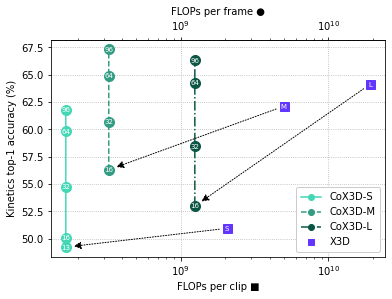

In [135]:
# Plot 
fig, ax = plt.subplots(constrained_layout=False)
# fig.set_size_inches(10,8)


# Params
markersize = 10
textsize = 7

ax.plot(CoX3D_s_flops, CoX3D_s_acc, c=amazonite, markersize=markersize, label="CoX3D-S", marker="o")
ax.plot(CoX3D_m_flops, CoX3D_m_acc, c=dark_amazonite, markersize=markersize, label="CoX3D-M", marker="o", linestyle="--")
ax.plot(CoX3D_l_flops, CoX3D_l_acc, c=very_dark_amazonite, markersize=markersize, label="CoX3D-L", marker="o", linestyle="-.")
ax.plot(x3d_flops, x3d_acc, c=ioite, markersize=markersize-1, label="X3D", marker="s", linestyle=" ")

ax.set_ylabel('Kinetics top-1 accuracy (%)')
ax.set_xlabel('FLOPs per clip ■') #◆
secax = ax.secondary_xaxis('top')
secax.set_xlabel('FLOPs per frame ●')

# Annotation

# - Arrows
prop = dict(arrowstyle="-|>,head_width=0.3,head_length=0.6",
            linestyle=":",
            color="black",
            shrinkA=8,shrinkB=8)
plt.annotate(
    "", 
    xy=(CoX3D_s_flops[0], CoX3D_s_acc[0]),
    xytext=(x3d_flops[0], x3d_acc[0], ), 
    arrowprops=prop,
)
plt.annotate(
    "", 
    xy=(CoX3D_m_flops[0], CoX3D_m_acc[0]),
    xytext=(x3d_flops[1], x3d_acc[1], ), 
    arrowprops=prop,
)
plt.annotate(
    "", 
    xy=(CoX3D_l_flops[0], CoX3D_l_acc[0]),
    xytext=(x3d_flops[2], x3d_acc[2], ), 
    arrowprops=prop,
)

# - X3D
for name, f, a in zip(["S", "M", "L"], x3d_flops, x3d_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
# - CoX3D
for name, f, a in zip([13,16,32,64,96], CoX3D_s_flops, CoX3D_s_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,32,64,96], CoX3D_m_flops, CoX3D_m_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    
for name, f, a in zip([16,32,64,96], CoX3D_l_flops, CoX3D_l_acc):
    ax.annotate(name, xy=(f, a), xytext=(f, a), ha='center', va='center', size=textsize, color="white")
    

# Axis color
# ax.spines['top'].set_color(col1)
# ax.spines['bottom'].set_color(col2)
# ax.spines['left'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.tick_params(axis='x', colors=col2)
# secax.tick_params(axis='x', colors=col1)

# General setup
legend = plt.legend(loc="lower right", framealpha=1.0, borderpad=0.5, markerscale=0.6,scatterpoints=1) 

ax.set_xscale('log'); #plt.xlim([0.1, 10])
plt.grid(linestyle='dotted')
plt.show()

In [136]:
fig.savefig("val-acc-vs-flops.pdf")

# Transient Response

In [138]:
# Prepare data
df = pd.read_csv("results/transient_response.csv").sort_values("co3d_forward_frame_delay")
df["test/top1acc"] = df["test/top1acc"]* 100
df["co3d_forward_frame_delay"] = df["co3d_forward_frame_delay"] + 1
df.head(5)

,Name,co3d_forward_frame_delay,test/top1acc,from_hparams_file,frames_per_clip,co3d_temporal_fill,_wandb
75,CoX3D_transient_replicate_fr2_s,1,0.275,models/x3d/hparams/s.yaml,13,replicate,NaN
61,CoX3D_transient_zeros_fr2_s,1,0.325,models/x3d/hparams/s.yaml,13,zeros,NaN
38,CoX3D_transient_replicate_fr2_m,1,0.650,models/x3d/hparams/m.yaml,16,replicate,NaN
20,CoX3D_transient_zeros_fr2_m,1,0.275,models/x3d/hparams/m.yaml,16,zeros,NaN
74,CoX3D_transient_replicate_fr2_s,9,0.275,models/x3d/hparams/s.yaml,13,replicate,NaN


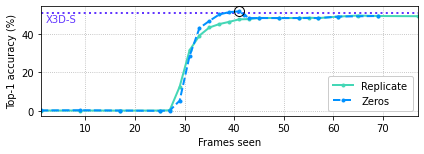

In [146]:
def time_and_acc(df, model, temporal_fill):
    df2 = df[df['co3d_temporal_fill'] == temporal_fill]
    df2 = df2[df2['from_hparams_file'] == f"models/x3d/hparams/{model}.yaml"]
    return df2["co3d_forward_frame_delay"], df2["test/top1acc"]

fig, ax = plt.subplots(figsize=(6,2.25))

lw=2
textsize = 10

# M
# plt.hlines(62.05, 0, 80, colors=ioite, linestyles=':', linewidth=lw)#, label='X3D-M')
# ax.annotate("X3D-M", xy=(2, 61.05), xytext=(2, 61.05), ha='left', va='top', size=textsize, color=ioite)

# t_0, acc_0 = time_and_acc(df, "m", "replicate")
# ax.plot(t_0, acc_0, "-", marker=".", c=dark_amazonite, linewidth=lw, label="Replicate")

# t_0, acc_0 = time_and_acc(df, "m", "zeros")
# ax.plot(t_0, acc_0, "--", marker=".", c=apatite, linewidth=lw, label="Zeros")

# plt.plot(72, 56.2, 'o', markersize=10, c="black", mfc='none')

# S
plt.hlines(50.95, 0, 80, colors=ioite, linestyles=':', linewidth=lw)#, label='X3D-S')
ax.annotate("X3D-S", xy=(2, 49.95), xytext=(2, 49.95), ha='left', va='top', size=textsize, color=ioite)

t_0, acc_0 = time_and_acc(df, "s", "replicate")
ax.plot(t_0, acc_0, "-", marker=".", c=amazonite, linewidth=lw, label="Replicate")

t_0, acc_0 = time_and_acc(df, "s", "zeros")
ax.plot(t_0, acc_0, "--", marker=".", c=saphire, linewidth=lw, label="Zeros")

plt.plot(41, 51.6, 'o', markersize=10, c="black", mfc='none')



# plt.vlines(72, 45, 54.2, colors="black", linestyles='-', linewidth=1)
# plt.vlines(69, 45, 48, colors="black", linestyles='-', linewidth=1)
# ax.annotate("Steady\nstate", xy=(75, 41), xytext=(75, 41), ha='right', va='center', size=textsize, color="black")

plt.grid(linestyle='dotted')
# ax.set_ylabel('Kinetics top-1 accuracy (%)')
ax.set_ylabel('Top-1 accuracy (%)')
ax.set_xlabel('Frames seen')
plt.xlim([1, 77])
ax.set_xlabel('Frames seen')

legend = plt.legend(loc="lower right", framealpha=1.0, borderpad=0.5) 
plt.tight_layout()

In [10]:
fig.savefig("transient_response_s_newcol.pdf")